# Current Topics in Digital Philology - Lab 1: Parsing Image Data
By Daan Brugmans

In the original notebook for the Parsing Image Data lab, students are requested to produce a notebook where they answer some questions and show the code they ran on which they based their answer. This notebook serves that purpose. The parts of this notebook answer the tasks/questions given in bold in the original Lab 1 notebook.

## Imports

In [ ]:
import matplotlib.pyplot as plt
import cv2
import pytesseract
from levenshtein import wer, cer

pytesseract.pytesseract.tesseract_cmd = "path/to/tesseract.exe"

## __Task 1__: Try out som values for the quality parameter and see what happens

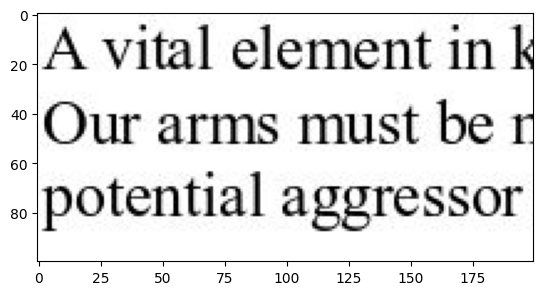

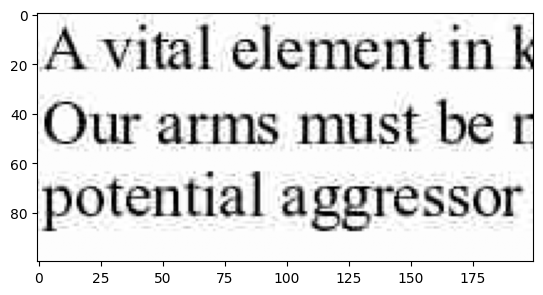

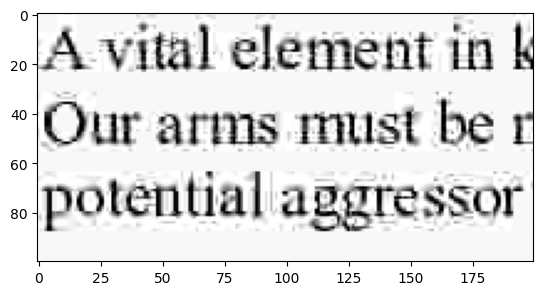

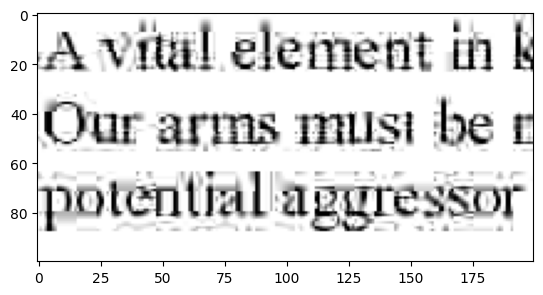

In [2]:
def jpeg_compression(image, quality=95):
    """
    Directly taken from the Lab 1 notebook.

    Apply JPEG compression to an image in memory

    Parameters
    ----------
    image : array-like, shape (height, width)
        array representing the image
    quality : Quality level of the compression 0 - 100 (higher is better)

    Returns
    -------
    new_image : array-like, shape (height, width)
    """
    return cv2.imdecode(
        cv2.imencode(".jpg", image, [cv2.IMWRITE_JPEG_QUALITY, quality])[1],
        cv2.IMREAD_GRAYSCALE,
    )


eisenhower_image = cv2.imread("5LN721/Eisenhower.png", cv2.IMREAD_GRAYSCALE)

quality_levels = [80, 20, 5, 0]
for quality_level in quality_levels:
    shrinked_image = jpeg_compression(eisenhower_image, quality=quality_level)

    plt.figure()
    plt.imshow(shrinked_image[:100, :200], cmap="gray")
    plt.show()

I've selected 4 different levels of compression:
- a slight compression of quality 80;
- a significant compression of quality 20;
- a very strong compression of quality 5; and
- the strongest compression of quality 0.

At quality 80, the text doesn't seem to be altered that much, and the letters are still quite easily separable from each other. At quality 20, the compression results in major artefacting, although the legibility of the text doesn't seem significantly impacted yet. Quality 5 has clearly reduced the legibility of the text, and I would say that at this point, OCR solutions will face a significant challenge in trying to parse the text. Finally, compression 0 messes with some letters so much that some of them aren't as easily recognizable anymore (such as the I in "vital"). I would assume that any OCR solution would have at least some troubles with this level of compression.

## __Task 2__: Try out som values for the scale_percent parameter and see what happens

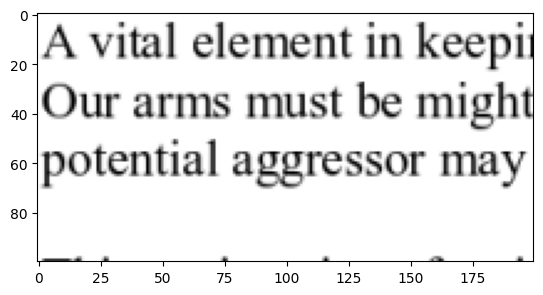

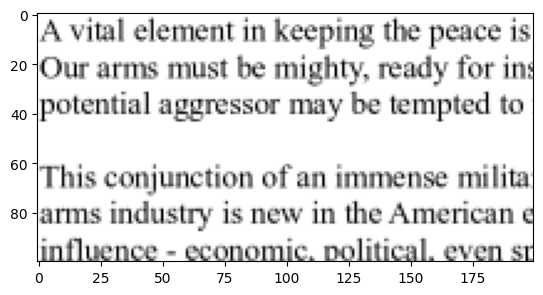

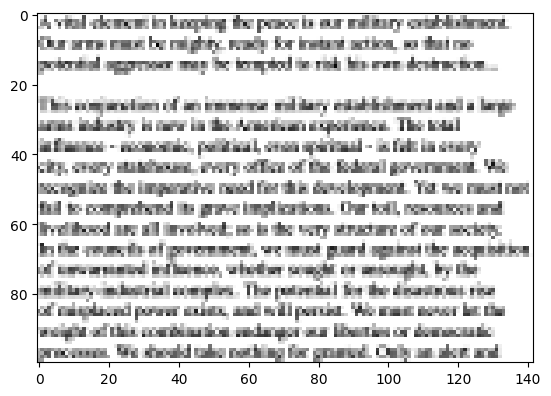

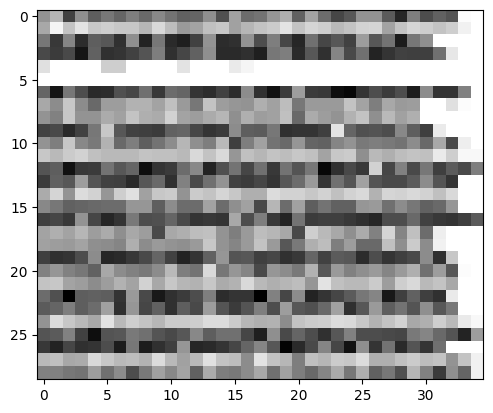

In [3]:
def shrink_image(image, scale_percent=90):
    """
    Taken directly from the Lab 1 notebook.

    Reduces the size of the image

    Parameters
    ----------
    image : array-like, shape (height, width)
        array representing the image
    scale_percent : size to scale down the image to 0 - 100

    Returns
    -------
    new_image : array-like, shape (height, width)
    """
    new_width = int(image.shape[1] * scale_percent / 100)
    new_height = int(image.shape[0] * scale_percent / 100)
    return cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)


eisenhower_image = cv2.imread("5LN721/Eisenhower.png", cv2.IMREAD_GRAYSCALE)

scales = [80, 50, 20, 5]
for scale in scales:
    shrinked_image = shrink_image(eisenhower_image, scale_percent=scale)

    plt.figure()
    plt.imshow(shrinked_image[:100, :200], cmap="gray")
    plt.show()

For this task, I've once again tried out 4 different levels, now for image scaling:
- scale 80 for a small reduction in size;
- scale 50 to half the size of the original image;
- scale 20 to significantly reduce the image size; and
- scale 5 to make the image tiny.

As a human reader, I would say that scale 80 and 50 are still quite legible. However, shrinking the image has also made the letters blurrier, and I can image that that will make it harder for an OCR solution to parse the image text properly (especially for scale 50). Scale 20 is very, very difficult to parse as a human reader, and many words are simply illegible. I would assume that this is past the limit of what an OCR solution would be capable of parsing. Finally, scale 5 is simply too intense, as the text has been reduced to a mosaic.

## __Question 1:__ Which types of noise do you think are most harmful?

Based on what I saw in the Image Manipulation notebook and the regular Lab 1 notebook, I would say that shrinking an image is the most harmful type of noise out of the noise types shown. As opposed to the JPEG and PCA-based compressions, which make the text unrecognizable starting at pretty severe levels of compression, shrinking the image seems to make the text illegible faster. Additionally, I think that a significant amount of Gaussian noise could make text in an image very difficult to parse by an OCR solution, since character borders can become very difficult to spot.

## __Question 2:__ What is the relation between the CER and WER. Does WER < CER always hold? Why (not)?

- CER and WER are both measures of accuracy for the prediction of text. They are used in OCR to have a concrete measure of how accurate the OCR solution is at parsing the image text when compared to a baseline, but they are, for example, also used in Automatic Speech Technology (ASR) to obtain a concrete measure of how well a transcribed text matches the actual ground truth text. Generally, it is easier to obtain a lower CER than WER: when an OCR/ASR/etc. solution predicts most characters in a string of words right, but not all, it will often have a low (good) CER and a high (bad) WER.
- WER < CER definitely does not always hold. Again, if an OCR/ASR/etc. solution predicts most of the characters in a word right, especially in a long word such as floccinaucinihilipilification, it will achieve a very low CER but a very high WER. Taking floccinaucinihilipilification as an example, if an OCR/ASR/etc. solution predicted floc-__k__-inaucinihilipilification, replacing the second "c" with a "k", it would get a very low CER of 3.45%, but a WER of 100%.
- Although CER < WER holds most of the time, WER < CER can definitely hold nonetheless. This can be achieved by, for example, computing WER and CER over a string of text with a lot of short words that are predicted correctly, and one very long word that is predicted very wrongly. An (unnatural) example would be the sentence "of and in a and it he is she floccinaucinihilipilification", where if we replace floccinaucinihilipilification with "aaaaaaaaaaaaaaaaaaaaaaaa", we would have a WER of 10% and a CER of 46.55%. CER and WER can thus both be greater or lesser than the other, although CER < WER is more common in practice.

## __Task 3:__ Try out the OCR part (whole of part 2) of this lab on the Gutenberg.{txt,png} data (also found in the repo).

In [4]:
with open("5LN721/Gutenberg.txt", "r", encoding="UTF-8") as file:
    original_text = file.read()
original_image = cv2.imread("5LN721/Gutenberg.png", cv2.IMREAD_GRAYSCALE)

print(original_text[:196])

Gutenberg [go’-], Johann (hette egentligen 
Henne Gensfleisch, men är mest känd under 
namnet G., upptaget efter en gård, som i flera 
släktled tillhört familjen), boktryckarkonstens 
uppfinnare, 


In [ ]:
extracted_text = pytesseract.image_to_string(
    original_image
)  # Runs OCR and outputs the result as a python string
print(extracted_text)

Gutenberg [go’-], Johann (hette egentligen
HenneGensfleisch, men dr mest kind under
namnet G., upptaget efter en gard, som i flera slikt-
led tillhért familjen), boktryckarkonstens uppfinnare,
f. mellan 1394 och 1397 i Mainz, d. dar 1468.
Bade pa fadernet och médernet hirstammade han
fran gamla patriciska familjer. Om hans lefnadsom-
stindigheter kinner man icke mycket. Redan fore
1430 lamnade han Mainz, och sedermera begaf han
sig till Strassburg, dir han bevisligen uppehdéll sig
1434 och dir han under de foéljande dren sysselsatte
sig med ’’geheime und wunderbare kiinste’’. 1439
uppstod mellan honom och hans kompanjoner en pro-
cess, hvars handlingar, som Annu finnas i behall, dro
af stor vikt for historien om boktryckarkonstens ur-
sprung. Under vistelsen i Strassburg foretog G. sina
forsta tryckningsférsék, och tanken att anvanda rir-
liga typer torde redan dir ha uppstatt hos honom.
Det var dock férst sedermera, som han anvinde sin
konst for praktiska dndamal. Efter att 1444 ha la

In [6]:
str1 = "bacon spam spam"
str2 = "spam spam"

# NOTE: I had to fix a bug in _levenshtein.pyx for this to work?????
#       I also had to install 10GBs of C++ binaries for this, so I would suggest switching to the JiWER library instead.
print("wer:", wer(str1, str2))
print("cer:", cer(str1, str2))

print(wer.__doc__)

wer: (np.int32(1), np.float64(0.3333333333333333))
cer: (np.int32(6), np.float64(0.4))

    Word Error Rate (WER) using Levenshtein distance

    Parameters
    ----------
    lhs : str
    rhs : str

    Returns
    -------
    errors : int
    error_rate: float

    Examples
    --------
    > wer("bacon spam spam", "spam spam")
    (1, 0.3333333333333333)
    


In [7]:
print(original_text.split()[:20])
print(extracted_text.split()[:20])

['Gutenberg', '[go’-],', 'Johann', '(hette', 'egentligen', 'Henne', 'Gensfleisch,', 'men', 'är', 'mest', 'känd', 'under', 'namnet', 'G.,', 'upptaget', 'efter', 'en', 'gård,', 'som', 'i']
['Gutenberg', '[go’-],', 'Johann', '(hette', 'egentligen', 'HenneGensfleisch,', 'men', 'dr', 'mest', 'kind', 'under', 'namnet', 'G.,', 'upptaget', 'efter', 'en', 'gard,', 'som', 'i', 'flera']


In [8]:
we = wer(original_text, extracted_text)
print("Word errors:", we[0])
print("WER:", we[1])

Word errors: 163
WER: 0.318359375


In [9]:
print(list(original_text)[:20])
print(list(extracted_text)[:20])
ce = cer(original_text, extracted_text)
print("Character errors:", ce[0])
print("CER:", ce[1])

['G', 'u', 't', 'e', 'n', 'b', 'e', 'r', 'g', ' ', '[', 'g', 'o', '’', '-', ']', ',', ' ', 'J', 'o']
['G', 'u', 't', 'e', 'n', 'b', 'e', 'r', 'g', ' ', '[', 'g', 'o', '’', '-', ']', ',', ' ', 'J', 'o']
Character errors: 320
CER: 0.09644364074743822


In [10]:
print("WER time:")
%timeit wer(original_text, extracted_text)
print("CER time:")
%timeit cer(original_text, extracted_text)

WER time:
297 ms ± 35.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
CER time:
11 s ± 368 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Qualitative Analysis

For the final part of this notebook, students must perform a qualitative analysis of the Tesseract OCR on a provided image after a form of noise has been introduced, and of the Tesseract OCR on data that is either damaged and/or historical that the students collect themselves. I have already mostly performed the first part above, and I will reuse that code to calculate WER and CER over the Eisenhower text at certain levels of noise. For the second part, I will use a snippet of text from the Overbetuwsche Novellen, a collection of novels from the 19th century written in Overbetuwish, a dialect of Dutch. Finally, a third part will introduce noise to the Overbetuwish text snippet in the same way that has been applied to the Eisenhower text.

### Part 1: Noise

In [11]:
eisenhower_image = cv2.imread("5LN721/Eisenhower.png", cv2.IMREAD_GRAYSCALE)
with open("5LN721/Eisenhower.txt", "r", encoding="UTF-8") as file:
    original_text = file.read()

In [12]:
quality_levels = [80, 20, 5, 0]
for quality_level in quality_levels:
    compressed_image = jpeg_compression(eisenhower_image, quality=quality_level)

    extracted_text = pytesseract.image_to_string(compressed_image)

    print("Quality Level:", quality_level)
    print("wer:", wer(original_text, extracted_text))
    print("cer:", cer(original_text, extracted_text))
    print()

Quality Level: 80
wer: (np.int32(0), np.float64(0.0))
cer: (np.int32(16), np.float64(0.01263823064770932))

Quality Level: 20
wer: (np.int32(0), np.float64(0.0))
cer: (np.int32(16), np.float64(0.01263823064770932))

Quality Level: 5
wer: (np.int32(5), np.float64(0.025380710659898477))
cer: (np.int32(21), np.float64(0.016587677725118485))

Quality Level: 0
wer: (np.int32(50), np.float64(0.25380710659898476))
cer: (np.int32(73), np.float64(0.05766192733017378))



In [13]:
scales = [80, 50, 20, 5]
for scale in scales:
    shrinked_image = shrink_image(eisenhower_image, scale_percent=scale)

    extracted_text = pytesseract.image_to_string(shrinked_image)

    print("Quality Level:", scale)
    print("wer:", wer(original_text, extracted_text))
    print("cer:", cer(original_text, extracted_text))
    print()

Quality Level: 80
wer: (np.int32(0), np.float64(0.0))
cer: (np.int32(16), np.float64(0.01263823064770932))

Quality Level: 50
wer: (np.int32(11), np.float64(0.05583756345177665))
cer: (np.int32(25), np.float64(0.019747235387045814))

Quality Level: 20
wer: (np.int32(197), np.float64(1.0))
cer: (np.int32(1266), np.float64(1.0))

Quality Level: 5
wer: (np.int32(197), np.float64(1.0))
cer: (np.int32(1266), np.float64(1.0))



The results above show the results of introducing noise to the original Eisenhower text image. This was done using the JPEG compression and shrinking functions used earlier, using the exact same set of values, which progressively make the noise more intense. The results show that JPEG compression only starts to significantly reduce OCR performance once very low quality levels are reached: for example, at JPEG quality level 5, Tesseract OCR still manages to achieve a WER of 2.5% and a CER of 1.6%, which are very good metrics. It is at JPEG quality level 0 that Tesseract starts to struggle, achieving a WER of 25% and a WER of 5.8%, although these values still are not that bad. In contrast, shrinking the original image can result in much worse WER and CER scores. Shrinking the original image to 50% of its size still enables Tesseract to achieve a WER of 5.6% and a CER of 2%, shrinking to 20% the original size simply makes the text unreadable, and a WER and CER of 100% is the result. Comparatively, the shrinking function thus seems a lot more potent in introducing noise to the text image.

### Part 2: Student Data

In [14]:
original_image = cv2.imread("overbetuwse_novellen.png", cv2.IMREAD_GRAYSCALE)

original_text = "Grietje op 't Hönings-arf. Stil, as't begint is't nacht, duustere stikduustere September-nacht. Ge stoat midden op den kleiweg die van B. woar 't karmis is, noar den Rien-diek geet. Ge stoat er, en de erste dorre blaoi - gezwiept deur 'en g elige weind - ze fledderen oe um 't heufd, maor, zien kuj ze niet. Ziem, krek zoomin as de tak' van de boom' die hen en weer scharmieren en krek zoomin as 't wêke, klesse, oan weerskanten hoog opgesjoepte woagenspoor, woar ie ien stêken blieft a'j d'r ien trooit. Niks"

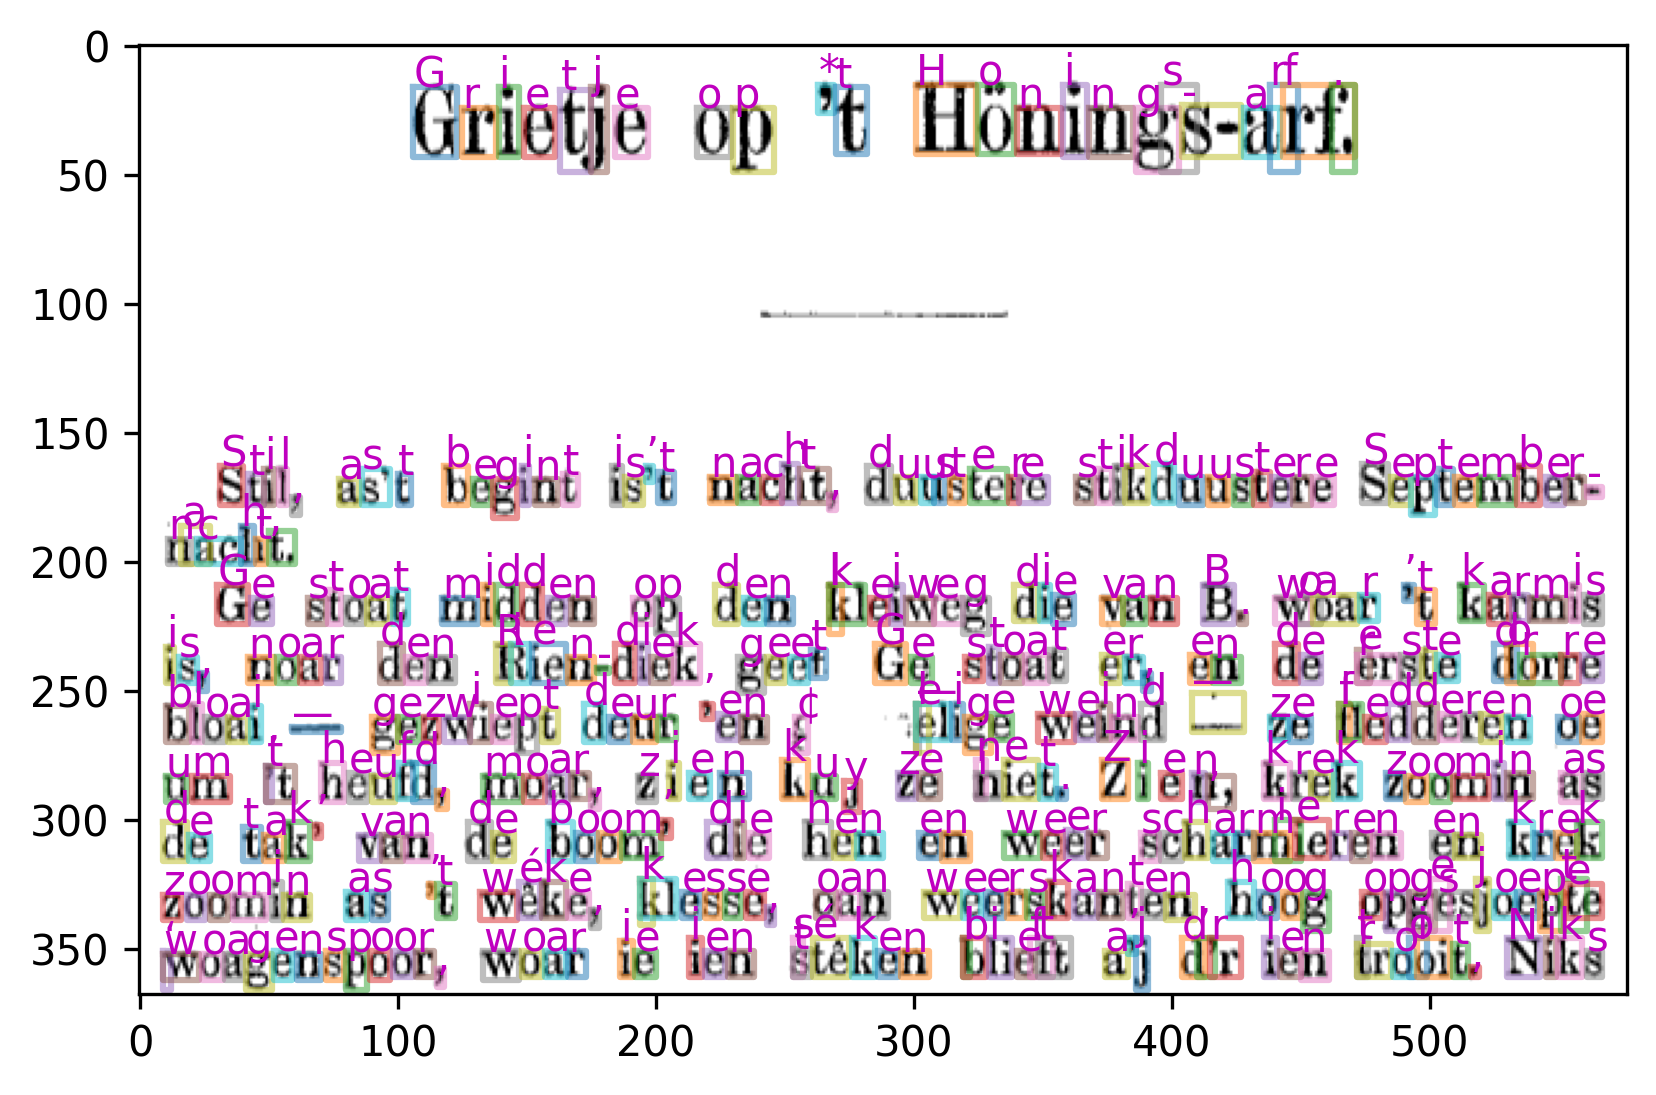

In [15]:
# These parameters can be used to crop the image
# show_y = (0, original_image.shape[0])
show_y = (0, 368)
# show_x = (0, original_image.shape[1])
show_x = (0, 577)

data = pytesseract.image_to_boxes(original_image)
# plt.figure(figsize=(10, 10))
plt.figure(dpi=300)

# TODO Fix offsets
plt.imshow(original_image[show_y[0] : show_y[1], show_x[0] : show_x[1]], cmap="gray")
# extent=[show_x[0], show_x[1], show_y[0], show_y[1]], cmap='gray')
for entry in data.split("\n"):
    if len(entry) > 0:
        char, a, b, c, d, _ = entry.split()
        assert int(a) <= int(c)
        assert int(b) <= int(d)
        x1 = int(a) - show_x[0]
        x2 = int(c) - show_x[0]
        y1 = original_image.shape[0] - int(d) - show_y[0]
        y2 = original_image.shape[0] - int(b) - show_y[0]
        if show_y[0] <= y1 and y2 <= show_y[1] and show_x[0] <= x1 and x2 <= show_x[1]:
            plt.plot(
                [x1, x1, x2, x2, x1], [y1, y2, y2, y1, y1], alpha=0.5
            )  # Plot the box
            plt.text(x1, y1, char, color="m")  # Plot the OCRed character
plt.show()

In [16]:
extracted_text = pytesseract.image_to_string(original_image)
print(extracted_text)

print("wer:", wer(original_text, extracted_text))
print("cer:", cer(original_text, extracted_text))

Grietje op *t Honings-arf.

Stil, ast begint is’t nacht, duustere stikduustere September-
nacht,

Ge stoat midden op den kleiweg die van B. woar ’t karmis
is, noar den Rien-diek geet Ge stoat er, en de erste dorre
bloai — gezwiept deur ’en ¢ —elige weind — ze fledderen oe
um ’t heufd, moar, zien kuy ze niet. Zien, krek zoomin as
de tak’ van de boom’ die hen en weer scharmieren en krek
zoomin as ’t wéke, klesse, oan weerskanten hoog opgesjoepte
‘woagenspoor, woar ie ien stéken blieft a’j d’r ien trooit, Niks

wer: (np.int32(27), np.float64(0.2903225806451613))
cer: (np.int32(40), np.float64(0.07797270955165692))


The Tesseract OCR manages to achieve a WER of 29% and a CER of 7.7%. I would consider this quite a solid result, since the original text is both not in English (nor in standard Dutch), but is also partially damaged/unreadable. Most mistakes seem to be made regarding the exact punctuation used, with apostrophes sometimes being transcribed as a different character, and with what type of accents are used on top of vowels (ê is commonly used in Overbetuwish and in the source text, but no ê was transcribed). Despite this, the transcribed text is quite understandable and does read like Overbetuwish.

### Part 3: Student Data with Noise

In [17]:
original_image = cv2.imread("overbetuwse_novellen.png", cv2.IMREAD_GRAYSCALE)

original_text = "Grietje op 't Hönings-arf. Stil, as't begint is't nacht, duustere stikduustere September-nacht. Ge stoat midden op den kleiweg die van B. woar 't karmis is, noar den Rien-diek geet. Ge stoat er, en de erste dorre blaoi - gezwiept deur 'en g elige weind - ze fledderen oe um 't heufd, maor, zien kuj ze niet. Ziem, krek zoomin as de tak' van de boom' die hen en weer scharmieren en krek zoomin as 't wêke, klesse, oan weerskanten hoog opgesjoepte woagenspoor, woar ie ien stêken blieft a'j d'r ien trooit. Niks"

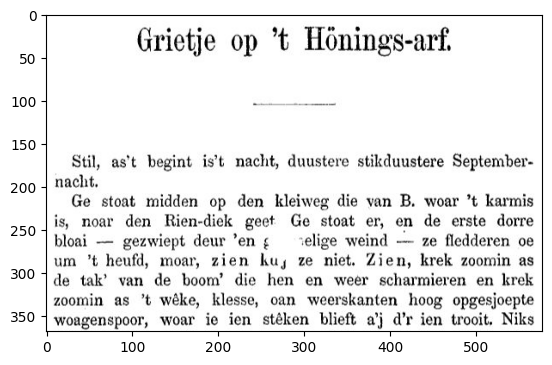

Quality Level: 5
wer: (np.int32(27), np.float64(0.2903225806451613))
cer: (np.int32(42), np.float64(0.08171206225680934))



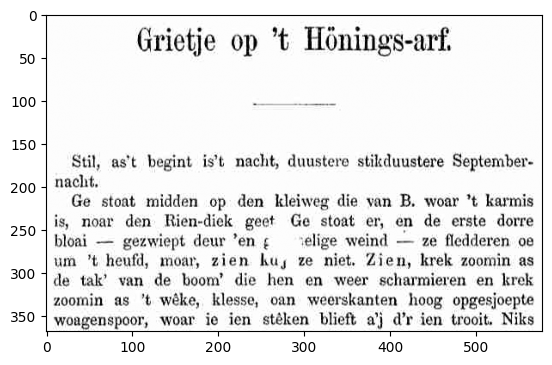

Quality Level: 5
wer: (np.int32(25), np.float64(0.26881720430107525))
cer: (np.int32(41), np.float64(0.07976653696498054))



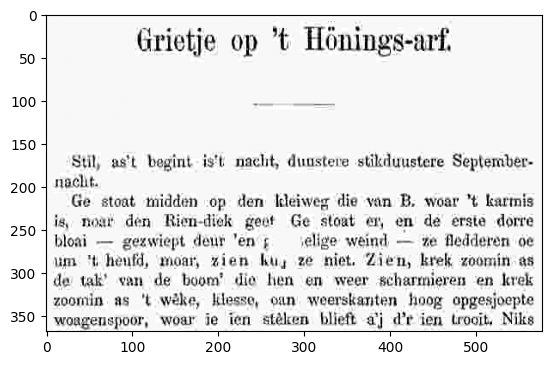

Quality Level: 5
wer: (np.int32(36), np.float64(0.3870967741935484))
cer: (np.int32(57), np.float64(0.111328125))



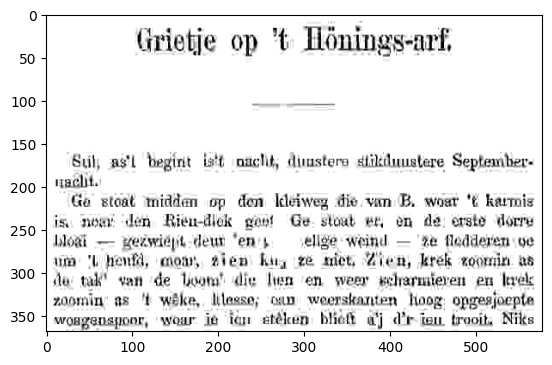

Quality Level: 5
wer: (np.int32(64), np.float64(0.6956521739130435))
cer: (np.int32(122), np.float64(0.23921568627450981))



In [18]:
quality_levels = [80, 20, 5, 0]
for quality_level in quality_levels:
    compressed_image = jpeg_compression(original_image, quality=quality_level)

    extracted_text = pytesseract.image_to_string(compressed_image)

    plt.figure()
    plt.imshow(compressed_image, cmap="gray")
    plt.show()

    print("Quality Level:", scale)
    print("wer:", wer(original_text, extracted_text))
    print("cer:", cer(original_text, extracted_text))
    print()

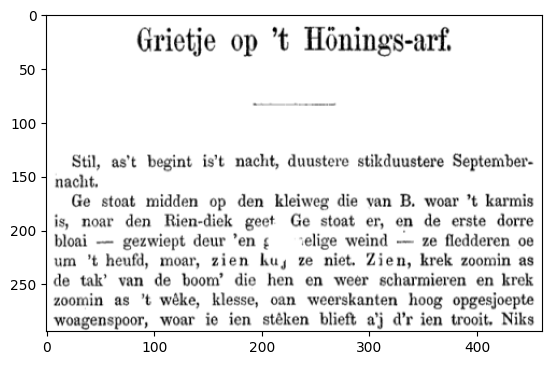

Relative Size: 0% of the original image
wer: (np.int32(23), np.float64(0.24468085106382978))
cer: (np.int32(37), np.float64(0.07198443579766536))



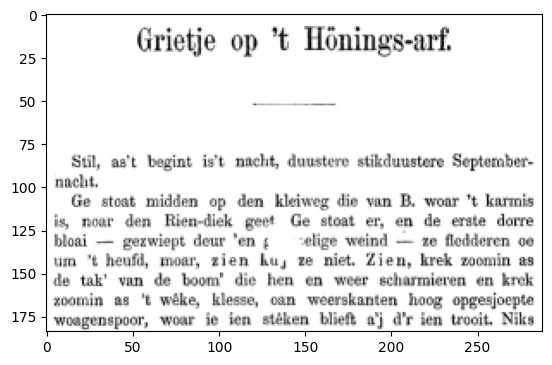

Relative Size: 0% of the original image
wer: (np.int32(64), np.float64(0.6956521739130435))
cer: (np.int32(105), np.float64(0.206286836935167))



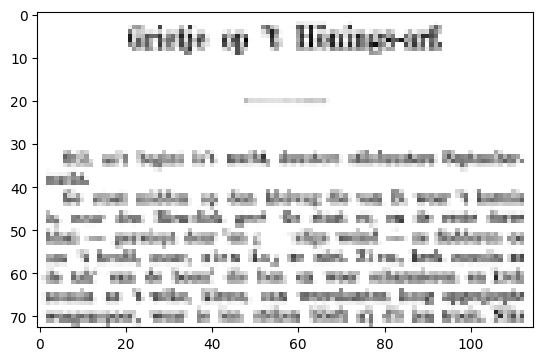

Relative Size: 0% of the original image
wer: (np.int32(92), np.float64(1.0))
cer: (np.int32(498), np.float64(0.9783889980353635))



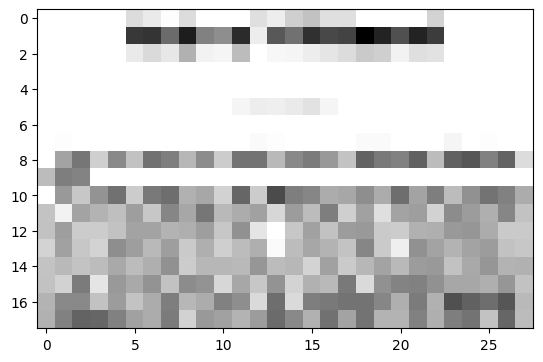

Relative Size: 0% of the original image
wer: (np.int32(92), np.float64(1.0))
cer: (np.int32(509), np.float64(1.0))



In [19]:
scales = [80, 50, 20, 5]
for scale in scales:
    shrinked_image = shrink_image(original_image, scale_percent=scale)

    extracted_text = pytesseract.image_to_string(shrinked_image)

    plt.figure()
    plt.imshow(shrinked_image, cmap="gray")
    plt.show()

    print(f"Relative Size: {quality_level}% of the original image")
    print("wer:", wer(original_text, extracted_text))
    print("cer:", cer(original_text, extracted_text))
    print()

The results above reflect the results of the Eisenhower text.
- The effects of JPEG compression on the image get more intense as the quality decreases. However, as opposed to the Eisenhower text, WER and CER scores reach high values at high compression levels. For example, while compression level 20 results in a WER of 26.9%, which is similar to the WER without any compression at all, compression level 5 results in a WER of 38.7%, and compression level 0 results in a high WER of 69.5%.
- The effects of shrinking the image are quite severe on Tesseract's ability to transcribe. Halving the image size results in a WER of 69.6%, about as bad as compressing the image using JPEG compression level 0. At 20% of the original size, WER becomes 100% and the text is almost completely illegible. 
- Overall, shrinking the image seems like a more potent way of introducing harmful amounts of noise into the image.